In [8]:
def studentReg(ages_train, net_worths_train):
    ### import the sklearn regression module, create, and train your regression
    from sklearn import linear_model

    ### name your regression reg
    reg=linear_model.LinearRegression()
    ### your code goes here!
    reg.fit(ages_train, net_worths_train)
    return reg

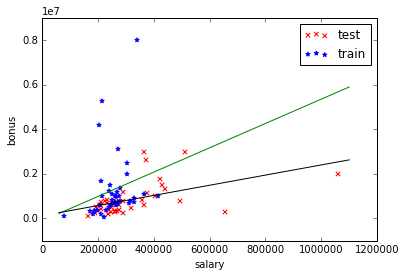

In [67]:


"""
    Starter code for the regression mini-project.
    
    Loads up/formats a modified version of the dataset
    (why modified?  we've removed some trouble points
    that you'll find yourself in the outliers mini-project).

    Draws a little scatterplot of the training/testing data

    You fill in the regression code where indicated:
"""    


import sys
import pickle
import numpy as np
sys.path.append("tools/")
from feature_format import featureFormat, targetFeatureSplit
dictionary = pickle.load( open("final_project/final_project_dataset_modified.pkl", "r") )

### list the features you want to look at--first item in the 
### list will be the "target" feature
features_list = ["bonus", "salary"]
data = featureFormat( dictionary, features_list, remove_any_zeroes=True)
target, features = targetFeatureSplit( data )

### training-testing split needed in regression, just like classification
from sklearn.cross_validation import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.5, random_state=42)
train_color = "b"
test_color = "r"



### Your regression goes here!
### Please name it reg, so that the plotting code below picks it up and 
### plots it correctly. Don't forget to change the test_color above from "b" to
### "r" to differentiate training points from test points.

reg = studentReg(feature_train, target_train)






### draw the scatterplot, with color-coded training and testing points
import matplotlib.pyplot as plt
%matplotlib inline
for feature, target in zip(feature_test, target_test):
    plt.scatter( feature, target, color=test_color, marker='x' ) 
for feature, target in zip(feature_train, target_train):
    plt.scatter( feature, target, color=train_color,marker='*' ) 

### labels for the legend
plt.scatter(feature_test[0], target_test[0], color=test_color, marker='x',label="test")
plt.scatter(feature_test[0], target_test[0], color=train_color,marker='*',label="train")




### draw the regression line, once it's coded
regmatrix=[np.asarray([60000.0]),np.asarray([1100000.0])]
try:
    plt.plot( regmatrix, reg.predict(regmatrix) ,'g')
except NameError:
    pass
plt.xlabel(features_list[1])
plt.ylabel(features_list[0])
reg.fit(feature_test, target_test)
plt.plot(regmatrix, reg.predict(regmatrix), color="k") 
plt.legend()
plt.show()


In [68]:
print reg.coef_[0],'X',reg.intercept_

2.27410114127 X 124444.388866


In [52]:
reg.score(feature_train,target_train)

0.045509192699524359

In [53]:
reg.score(feature_test,target_test)

-1.4849924173685101

In [189]:
def outlierCleaner(predictions, ages, net_worths):
    """
        Clean away the 10% of points that have the largest
        residual errors (difference between the prediction
        and the actual net worth).

        Return a list of tuples named cleaned_data where 
        each tuple is of the form (age, net_worth, error).
    """
    rss=zip(ages,net_worths,pow(predictions-net_worths,2))
    rss=sorted(rss ,key=lambda x: x[2],reverse=True)
    #10%
    cleaned_data = rss[int(.1*len(predictions)):]

    ### your code goes here

    
    return cleaned_data



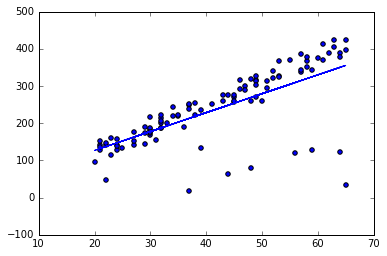

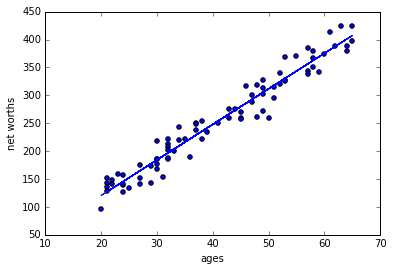

In [190]:
import random
import numpy
import matplotlib.pyplot as plt
import pickle
#sys.path.append("outliers/")
#from outlier_cleaner import outlierCleaner


### load up some practice data with outliers in it
ages = pickle.load( open("outliers/practice_outliers_ages.pkl", "r") )
net_worths = pickle.load( open("outliers/practice_outliers_net_worths.pkl", "r") )



### ages and net_worths need to be reshaped into 2D numpy arrays
### second argument of reshape command is a tuple of integers: (n_rows, n_columns)
### by convention, n_rows is the number of data points
### and n_columns is the number of features
ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))
from sklearn.cross_validation import train_test_split
ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths, test_size=0.1, random_state=42)

### fill in a regression here!  Name the regression object reg so that
### the plotting code below works, and you can see what your regression looks like
reg=studentReg(ages_train,net_worths_train)
try:
    plt.plot(ages, reg.predict(ages), color="blue")
except NameError:
    pass
plt.scatter(ages, net_worths)
plt.show()


### identify and remove the most outlier-y points
cleaned_data = []
try:
    predictions = reg.predict(ages_train)
    cleaned_data = outlierCleaner( predictions, ages_train, net_worths_train )
except NameError:
    print "your regression object doesn't exist, or isn't name reg"
    print "can't make predictions to use in identifying outliers"


### only run this code if cleaned_data is returning data
if len(cleaned_data) > 0:
    ages, net_worths, errors = zip(*cleaned_data)
    ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
    net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))

    ### refit your cleaned data!
    try:
        reg1=studentReg(ages, net_worths)
        plt.plot(ages, reg1.predict(ages), color="blue")
    except NameError:
        print "you don't seem to have regression imported/created,"
        print "   or else your regression object isn't named reg"
        print "   either way, only draw the scatter plot of the cleaned data"
    plt.scatter(ages, net_worths)
    plt.xlabel("ages")
    plt.ylabel("net worths")
    plt.show()


else:
    print "outlierCleaner() is returning an empty list, no refitting to be done"


In [191]:
print reg.coef_,reg1.coef_
print reg.score(ages_test,net_worths_test)
print reg1.score(ages_test,net_worths_test)

[[ 5.07793064]] [[ 6.36859481]]
0.878262470366
0.983189455396


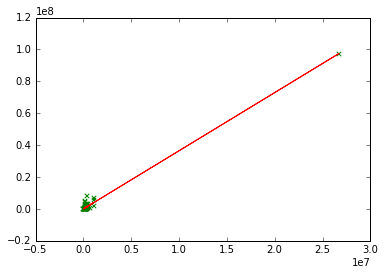

In [222]:
import pickle
import sys
import matplotlib.pyplot
sys.path.append("tools/")
from feature_format import featureFormat, targetFeatureSplit


### read in data dictionary, convert to numpy array
data_dict = pickle.load( open("final_project/final_project_dataset.pkl", "r") )
features = ["salary", "bonus"]
data = featureFormat(data_dict, features)
inputs=np.asarray(data[:,0]).reshape(len(data),-1)
labels=np.asarray(data[:,1]).reshape(len(data),-1)
regd=studentReg(inputs,labels)

### your code below

matplotlib.pyplot.scatter(np.asarray(inputs.tolist()),np.asarray(labels.tolist()),color='g',marker='x')
matplotlib.pyplot.plot( inputs,regd.predict(inputs),'r')

In [217]:
predictions=regd.predict(inputs)
names=np.asarray(data_dict.keys())
rss=zip(names,inputs,labels)
rss=sorted(rss ,key=lambda x: x[2],reverse=True)
#10%
cleaned_data = rss[int(.1*len(predictions)):]

In [220]:
print data_dict['TOTAL']
rss


{'salary': 26704229, 'to_messages': 'NaN', 'deferral_payments': 32083396, 'total_payments': 309886585, 'exercised_stock_options': 311764000, 'bonus': 97343619, 'restricted_stock': 130322299, 'shared_receipt_with_poi': 'NaN', 'restricted_stock_deferred': -7576788, 'total_stock_value': 434509511, 'expenses': 5235198, 'loan_advances': 83925000, 'from_messages': 'NaN', 'other': 42667589, 'from_this_person_to_poi': 'NaN', 'poi': False, 'director_fees': 1398517, 'deferred_income': -27992891, 'long_term_incentive': 48521928, 'email_address': 'NaN', 'from_poi_to_this_person': 'NaN'}


[('OLSON CINDY K', array([ 26704229.]), array([ 97343619.])),
 ('WODRASKA JOHN', array([ 339288.]), array([ 8000000.])),
 ('KOPPER MICHAEL J', array([ 1072321.]), array([ 7000000.])),
 ('LINDHOLM TOD A', array([ 1111258.]), array([ 5600000.])),
 ('SHELBY REX', array([ 213999.]), array([ 5249999.])),
 ('GAHN ROBERT S', array([ 201955.]), array([ 4175000.])),
 ('COLWELL WESLEY', array([ 271442.]), array([ 3100000.])),
 ('HICKERSON GARY J', array([ 510364.]), array([ 3000000.])),
 ('LEWIS RICHARD', array([ 365163.]), array([ 3000000.])),
 ('MORDAUNT KRISTINA M', array([ 370448.]), array([ 2600000.])),
 ('FASTOW ANDREW S', array([ 304588.]), array([ 2500000.])),
 ('MULLER MARK S', array([ 304110.]), array([ 2000000.])),
 ('BELDEN TIMOTHY N', array([ 1060932.]), array([ 2000000.])),
 ('MCCONNELL MICHAEL S', array([ 420636.]), array([ 1750000.])),
 ('CHAN RONNIE', array([ 211788.]), array([ 1700000.])),
 ('CORDES WILLIAM R', array([ 243293.]), array([ 1500000.])),
 ('BECK SALLY W', array([ 4

In [221]:
for d in data_dict.items():
    if d[1]['salary']==339288 or d[1]['bonus']==8000000:
        print d 

('LAVORATO JOHN J', {'salary': 339288, 'to_messages': 7259, 'deferral_payments': 'NaN', 'total_payments': 10425757, 'exercised_stock_options': 4158995, 'bonus': 8000000, 'restricted_stock': 1008149, 'shared_receipt_with_poi': 3962, 'restricted_stock_deferred': 'NaN', 'total_stock_value': 5167144, 'expenses': 49537, 'loan_advances': 'NaN', 'from_messages': 2585, 'other': 1552, 'from_this_person_to_poi': 411, 'poi': False, 'director_fees': 'NaN', 'deferred_income': 'NaN', 'long_term_incentive': 2035380, 'email_address': 'john.lavorato@enron.com', 'from_poi_to_this_person': 528})


In [205]:
#data_dict